In [1]:
# Importing Libraries
from ampere_utils.plot import polar_plot, configure_polar_plot
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt

In [3]:
# Loading Data:
filepath = r"C:\Users\Furio\Documents\University\Master's\Internship\Data" # Change Appropriately
Ampere_file_location = filepath + r"\AMPERE\grd\2015"
Ampere_file = Ampere_file_location + r"\ampere.20150101.0000.86400.120.north.grd.ncdf"
data = xr.load_dataset(Ampere_file)
data

<xarray.Dataset> Size: 180MB
Dimensions:       (nRec: 720, nObs: 1200, vComp: 3)
Dimensions without coordinates: nRec, nObs, vComp
Data variables: (12/34)
    npnt          (nRec) int16 1kB 1200 1200 1200 1200 ... 1200 1200 1200 1200
    year          (nRec) int16 1kB 2015 2015 2015 2015 ... 2015 2015 2015 2015
    doy           (nRec) int16 1kB 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    time          (nRec) float32 3kB 0.0 0.03333 0.06667 ... 23.9 23.93 23.97
    avgint        (nRec) int16 1kB 600 600 600 600 600 ... 600 600 600 600 600
    kmax          (nRec) int16 1kB 60 60 60 60 60 60 60 ... 60 60 60 60 60 60 60
    ...            ...
    del_db_geo    (nRec, nObs, vComp) float64 21MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    del_jPar      (nRec, nObs) float64 7MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    del_db_Th_Th  (nRec, nObs) float64 7MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    del_db_Ph_Th  (nRec, nObs) float64 7MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    del_db_Th_Ph  (nRec, nObs) float64 7MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    del_db_Ph_Ph  (nRec, nObs) float64 7MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    title:        Ampere data for 2015-01-01 00:00 - 2015-01-02 00:00.
    description:  AMPERE GRD data (fitted magnetic pertubation data).
    created:      2023-03-22T17:04:52-04:00

In [9]:
# Loading MLT and Colat Variables
mlt = np.array(data.mlt_hr)
clat = np.array(data.cLat_deg)
current_density = np.array(data.jPar)
print("mlt is,",mlt.shape)
print("clat is,",clat.shape)
print("data is,",data.jPar.shape)

mlt is, (720, 1200)
clat is, (720, 1200)
data is, (720, 1200)


In [7]:
# Converting time into datetime format:
time = np.array([dt.datetime(2015, 1, 1) + dt.timedelta(seconds = int(np.round(((t*3600))))) for t in data.time.data])
time

array([datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2015, 1, 1, 0, 2),
       datetime.datetime(2015, 1, 1, 0, 4),
       datetime.datetime(2015, 1, 1, 0, 6),
       datetime.datetime(2015, 1, 1, 0, 8),
       datetime.datetime(2015, 1, 1, 0, 10),
       datetime.datetime(2015, 1, 1, 0, 12),
       datetime.datetime(2015, 1, 1, 0, 14),
       datetime.datetime(2015, 1, 1, 0, 16),
       datetime.datetime(2015, 1, 1, 0, 18),
       datetime.datetime(2015, 1, 1, 0, 20),
       datetime.datetime(2015, 1, 1, 0, 22),
       datetime.datetime(2015, 1, 1, 0, 24),
       datetime.datetime(2015, 1, 1, 0, 26),
       datetime.datetime(2015, 1, 1, 0, 28),
       datetime.datetime(2015, 1, 1, 0, 30),
       datetime.datetime(2015, 1, 1, 0, 32),
       datetime.datetime(2015, 1, 1, 0, 34),
       datetime.datetime(2015, 1, 1, 0, 36),
       datetime.datetime(2015, 1, 1, 0, 38),
       datetime.datetime(2015, 1, 1, 0, 40),
       datetime.datetime(2015, 1, 1, 0, 42),
       datetime

Text(0.5, 0.98, '2015-01-01 00:00:00')

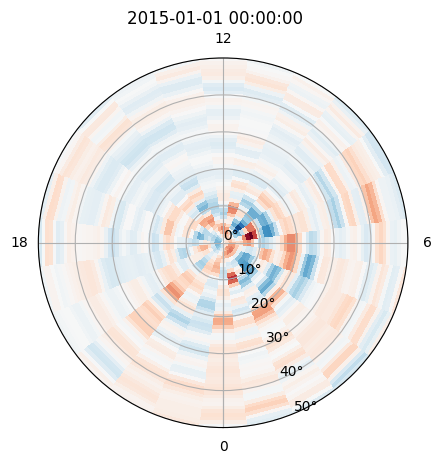

In [21]:
# Producing a polar plot -- Defining own MLT and Clat as ones above are arrays of repeated values
mlt = np.arange(24)
clat = np.arange(1,51)

j = data.jPar[0,:].data.reshape(24,50)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
polar_plot(mlt,clat,j, hemisphere = "north", ax = ax)
plt.suptitle(time[0])